In [1]:
#description: this program predicts if a passenger will survive on the titanic

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.naive_bayes import GaussianNB

In [3]:
#load the data
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

#print the first 10 rows of the data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_df.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [6]:
total=train_df.isnull().sum().sort_values(ascending=False)
percent1=train_df.isnull().sum()/train_df.isnull().count() *100
percent2=(round(percent1,1)).sort_values(ascending=False)
missing_data=pd.concat([total,percent2],axis=1,keys=['total','%'])
missing_data.head(10)

,total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0
Sex,0,0.0
Name,0,0.0
Pclass,0,0.0


In [7]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

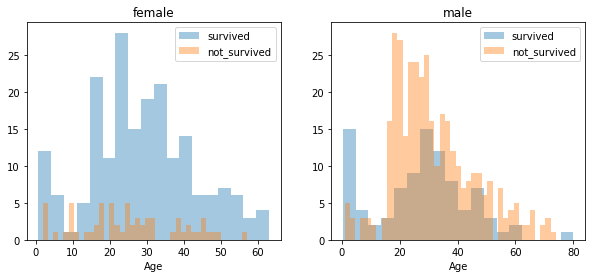

In [8]:
survived='survived'
not_survived='not_survived'
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,4))
women=train_df[train_df['Sex']=='female']
men=train_df[train_df['Sex']=='male']
ax=sns.distplot(women[women['Survived']==1].Age.dropna(),bins=18,label=survived,ax=axes[0],kde=False)
ax=sns.distplot(women[women['Survived']==0].Age.dropna(),bins=40,label=not_survived,ax=axes[0],kde=False)
ax.legend()
ax.set_title('female')
ax=sns.distplot(men[men['Survived']==1].Age.dropna(),bins=18,label=survived,ax=axes[1],kde=False)
ax=sns.distplot(men[men['Survived']==0].Age.dropna(),bins=40,label=not_survived,ax=axes[1],kde=False)
ax.legend()
_=ax.set_title('male')

c:\users\aniroy\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


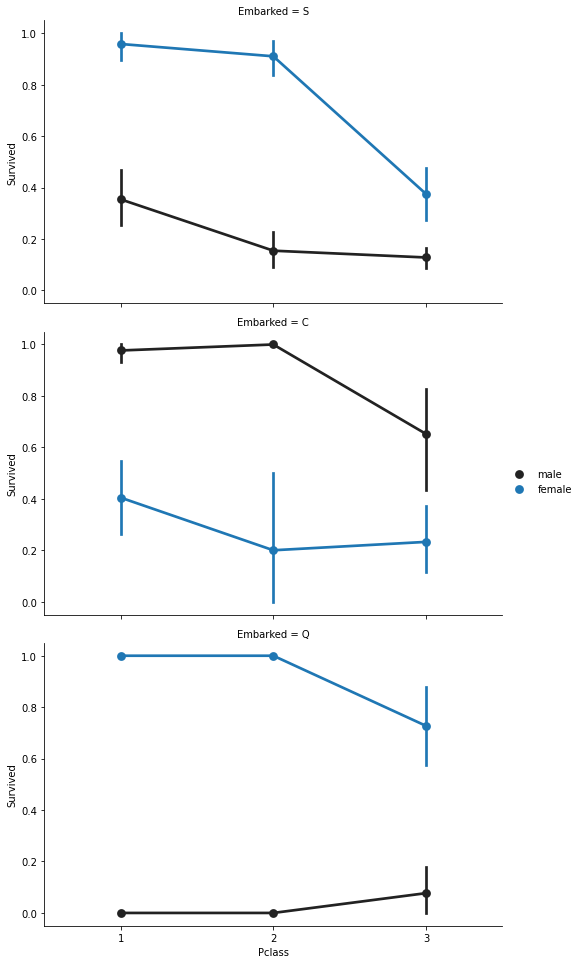

In [9]:
facetgrid=sns.FacetGrid(train_df,row='Embarked',size=4.5,aspect=1.6)
facetgrid.map(sns.pointplot,'Pclass','Survived','Sex',palette=None,order=None,hue_order=None)
facetgrid.add_legend()

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

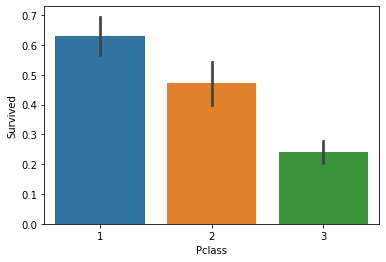

In [10]:
sns.barplot(x='Pclass',y='Survived',data=train_df)

c:\users\aniroy\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


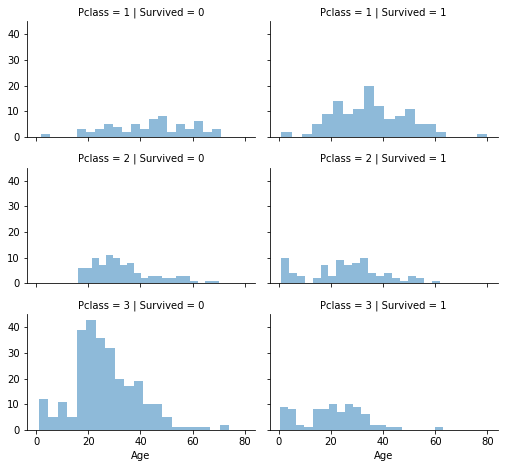

In [11]:
grid=sns.FacetGrid(train_df,col='Survived',row='Pclass',size=2.2,aspect=1.6)
grid.map(plt.hist,'Age',alpha=.5,bins=20)
grid.add_legend()

In [12]:
data=[train_df,test_df]
for dataset in data:
    dataset['relatives']=dataset['SibSp']+dataset['Parch']
    dataset.loc[dataset['relatives']>0,'not alone']=0
    dataset.loc[dataset['relatives']==0,'not alone']=1
    dataset['not alone']=dataset['not alone'].astype(int)
    
train_df['not alone'].value_counts()

1    537
0    354
Name: not alone, dtype: int64

c:\users\aniroy\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


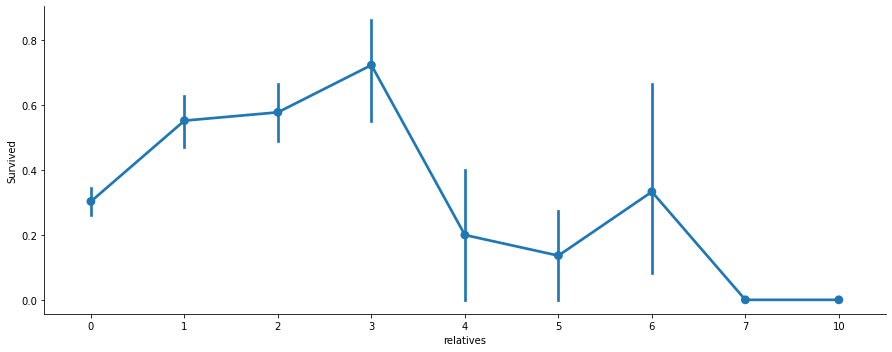

In [13]:
axes=sns.factorplot('relatives','Survived',data=train_df,aspect=2.5,)

In [14]:
train_df=train_df.drop(['PassengerId'],axis=1)

In [15]:
import re
deck={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'U':8}
data=[train_df,test_df]

for dataset in data:
    dataset['Cabin']=dataset['Cabin'].fillna('UO')
    dataset['deck']=dataset['Cabin'].map(lambda x:re.compile('([a-zA-Z]+)').search(x).group())
    dataset['deck']=dataset['deck'].map(deck)
    dataset['deck']=dataset['deck'].fillna(0)
    dataset['deck']=dataset['deck'].astype(int)
    
train_df=train_df.drop(['Cabin'],axis=1)
test_df=test_df.drop(['Cabin'],axis=1)

In [16]:
data=[train_df,test_df]

for dataset in data:
    mean=train_df['Age'].mean()
    std=train_df['Age'].std()
    is_null=dataset['Age'].isnull().sum()
    rand_age=np.random.randint(mean-std,mean+std,size=is_null)
    age_slice=dataset['Age'].copy()
    age_slice[np.isnan(age_slice)]=rand_age
    dataset['Age']=age_slice
    dataset['Age']=train_df['Age'].astype(int)
    
train_df['Age'].isnull().sum()

0

In [17]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [18]:
common_value='S'
data=[train_df,test_df]

for dataset in data:
    dataset['Embarked']=dataset['Embarked'].fillna(common_value)

In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    int32  
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    float64
 9   Embarked   891 non-null    object 
 10  relatives  891 non-null    int64  
 11  not alone  891 non-null    int32  
 12  deck       891 non-null    int32  
dtypes: float64(1), int32(3), int64(5), object(4)
memory usage: 80.2+ KB


In [20]:
data=[train_df,test_df]

for dataset in data:
    dataset['Fare']=dataset['Fare'].fillna(0)
    dataset['Fare']=dataset['Fare'].astype(int)

In [21]:
data=[train_df,test_df]
titles={'Mr':1,'Miss':2,'Mrs':3,'Master':4,'Rare':5}

for dataset in data:
    dataset['Title']=dataset.Name.str.extract('([A-Za-z]+)\.',expand=False)
    dataset['Title']=dataset['Title'].replace(['Lady','Countess','Capt','Col','Don','dr',\
                                              'Major','Rev','Sir','Jonkheer','Dona'],'Rare')
    dataset['Title']=dataset['Title'].replace('Mlle','Miss')
    dataset['Title']=dataset['Title'].replace('Ms','Miss')
    dataset['Title']=dataset['Title'].replace('Mme','Mrs')
    dataset['Title']=dataset['Title'].map(titles)
    dataset['Title']=dataset['Title'].fillna(0)
    
train_df=train_df.drop(['Name'],axis=1)
test_df=test_df.drop(['Name'],axis=1)

In [22]:
genders={'male':0,'female':1}
data=[train_df,test_df]

for dataset in data:
    dataset['Sex']=dataset['Sex'].map(genders)

In [23]:
train_df['Ticket'].describe()

count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object

In [24]:
train_df=train_df.drop(['Ticket'],axis=1)
test_df=test_df.drop(['Ticket'],axis=1)

In [25]:
ports={"S":0,"C":1,"Q":2}
data=[train_df,test_df]

for dataset in data:
    dataset['Embarked']=dataset['Embarked'].map(ports)

In [26]:
data=[train_df,test_df]
for dataset in data:
    dataset['Age']=dataset['Age'].astype(int)
    dataset.loc[dataset['Age']<=11,'Age']=0
    dataset.loc[(dataset['Age']>11)&(dataset['Age']<=18),'Age']=1
    dataset.loc[(dataset['Age']>18)&(dataset['Age']<=22),'Age']=2
    dataset.loc[(dataset['Age']>22)&(dataset['Age']<=27),'Age']=3
    dataset.loc[(dataset['Age']>27)&(dataset['Age']<=33),'Age']=4
    dataset.loc[(dataset['Age']>33)&(dataset['Age']<=40),'Age']=5
    dataset.loc[(dataset['Age']>40)&(dataset['Age']<=66),'Age']=6
    dataset.loc[dataset['Age']>11,'Age']=6
    train_df['Age'].value_counts()

In [27]:
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not alone,deck,Title
0,0,3,0,2,1,0,7,0,1,0,0,1.0
1,1,1,1,5,1,0,71,1,1,0,3,3.0
2,1,3,1,3,0,0,7,0,0,1,0,2.0
3,1,1,1,5,1,0,53,0,1,0,3,3.0
4,0,3,0,5,0,0,8,0,0,1,0,1.0
5,0,3,0,5,0,0,8,2,0,1,0,1.0
6,0,1,0,6,0,0,51,0,0,1,5,1.0
7,0,3,0,0,3,1,21,0,4,0,0,4.0
8,1,3,1,3,0,2,11,0,2,0,0,3.0
9,1,2,1,1,1,0,30,1,1,0,0,3.0


In [29]:
data=[train_df,test_df]
for dataset in data:
    dataset.loc[dataset['Fare']<=7.91,'Fare']=0
    dataset.loc[(dataset['Fare']>7.91)&(dataset['Fare']<=14.454),'Fare']=1
    dataset.loc[(dataset['Fare']>14.454)&(dataset['Fare']<=31),'Fare']=2
    dataset.loc[(dataset['Fare']>31)&(dataset['Fare']<=99),'Fare']=3
    dataset.loc[(dataset['Fare']>99)&(dataset['Fare']<=258),'Fare']=4
    dataset.loc[dataset['Fare']>7.91,'Fare']=5
    dataset['Fare']=dataset['Fare'].astype(int)

In [30]:
data=[train_df,test_df]
for dataset in data:
    dataset['Age_class']=dataset['Age']*dataset['Pclass']

In [34]:
for dataset in data:
    dataset['Fare_per_person']=dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_per_person']=dataset['Fare_per_person'].astype(int)

In [46]:
train_df=train_df.drop('fare_per_person',axis=1)
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not alone,deck,Title,Age_class,Fare_per_person
0,0,3,0,2,1,0,0,0,1,0,0,1.0,6,0
1,1,1,1,5,1,0,3,1,1,0,3,3.0,5,1
2,1,3,1,3,0,0,0,0,0,1,0,2.0,9,0
3,1,1,1,5,1,0,3,0,1,0,3,3.0,5,1
4,0,3,0,5,0,0,1,0,0,1,0,1.0,15,1
5,0,3,0,5,0,0,1,2,0,1,0,1.0,15,1
6,0,1,0,6,0,0,3,0,0,1,5,1.0,6,3
7,0,3,0,0,3,1,2,0,4,0,0,4.0,0,0
8,1,3,1,3,0,2,1,0,2,0,0,3.0,9,0
9,1,2,1,1,1,0,2,1,1,0,0,3.0,2,1


In [48]:
x_train=train_df.drop('Survived',axis=1)
y_train=train_df['Survived']
x_test=test_df.drop('PassengerId',axis=1).copy()

In [52]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_test)

sgd.score(x_train, y_train)

acc_sgd = round(sgd.score(x_train, y_train) * 100, 2)

In [53]:
print(y_pred)
print(acc_sgd)

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0]
72.84


In [57]:
random_forest=RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train,y_train)

y_prediction=random_forest.predict(x_test)

random_forest.score(x_train,y_train)
acc_random_forest=round(random_forest.score(x_train,y_train)*100,2)

In [58]:
print(y_prediction)
print(acc_random_forest)

[0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 0 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0
 0 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 1 1 0 1 1 0 0 1 0 0 1]
92.7


In [60]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)

y_pred_log=logreg.predict(x_test)

acc_logreg=round(logreg.score(x_train,y_train)*100,2)

In [61]:
print(y_pred_log)
print(acc_logreg)

[0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1
 1 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 1 1 0 1 1 1 0 1 0 0 0]
82.38


In [63]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

y_pred_knn=knn.predict(x_test)

acc_knn=round(knn.score(x_train,y_train)*100,2)

In [64]:
print(y_pred_knn)
print(acc_knn)

[0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 1 1
 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0
 1 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1
 0 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 0 0 0 0 0 1
 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0
 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0
 0 1 0 1 1 0 0 1 0 0 1]
86.87


In [66]:
gaussian=GaussianNB()
gaussian.fit(x_train,y_train)

y_pred_gauss=gaussian.predict(x_test)

acc_gauss=round(gaussian.score(x_train,y_train)*100,2)

In [67]:
print(y_pred_gauss)
print(acc_gauss)

[0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 1
 1 1 0 1 0 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0
 0 1 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 1 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1 0 1 0 0
 1 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 0 0
 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0
 1 1 1 0 1 0 0 1 0 0 1]
78.23


In [70]:
perceptron=Perceptron(max_iter=1000)
perceptron.fit(x_train,y_train)

y_pred_percep=perceptron.predict(x_test)

acc_percep=round(perceptron.score(x_train,y_train)*100,2)

In [71]:
print(y_pred_percep)
print(acc_percep)

[0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 0 1 1
 1 1 0 1 0 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0
 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0
 1 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 1 1 0 0 1 0 0 1 0 0 1]
78.34


In [72]:
linearsvc=LinearSVC()
linearsvc.fit(x_train,y_train)

y_pred_svc=linearsvc.predict(x_test)

acc_svc=round(linearsvc.score(x_train,y_train)*100,2)

c:\users\aniroy\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [73]:
print(y_pred_svc)
print(acc_svc)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 1 1 0 1 1 1 0 1 0 0 0]
82.04


In [74]:
decision_tree=DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)

y_pred_dec=decision_tree.predict(x_test)

acc_dec=round(decision_tree.score(x_train,y_train)*100,2)

In [75]:
results=pd.DataFrame({
    'Model':['Support vector machine','KNN','Logistic Regression','Naive Bayes','Decision Tree','Perceptron','Stochastic Gradient','Random Forest'],
    'Score':['acc_svc','acc_knn','acc_logreg','acc_gauss','acc_dec','acc_percep','acc_sgd','acc_random_forest']
})
results_df=results.sort_values(by='Score',ascending=False)
results_df=results_df.set_index('Score')
results_df.head(9)

,Model
Score,
acc_svc,Support vector machine
acc_sgd,Stochastic Gradient
acc_random_forest,Random Forest
acc_percep,Perceptron
acc_logreg,Logistic Regression
acc_knn,KNN
acc_gauss,Naive Bayes
acc_dec,Decision Tree
